In [1]:
# First, let's import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)


## 1. What is a Neural Network?

A neural network is a computational model inspired by the human brain. At its core, it consists of:
- **Neurons**: Basic processing units that take inputs and produce outputs
- **Weights**: Connection strengths between neurons
- **Biases**: Additional parameters that help the network learn
- **Activation Functions**: Non-linear functions that help the network learn complex patterns

Let's create a simple neural network with:
- Input Layer (2 neurons)
- Hidden Layer (3 neurons)
- Output Layer (1 neuron)


In [2]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.bias2 = np.zeros((1, output_size))
    
    def sigmoid(self, x):
        # Activation function
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        # Forward propagation
        self.hidden = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = self.sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

# Create a neural network instance
nn = SimpleNeuralNetwork(input_size=2, hidden_size=3, output_size=1)

# Create some example input data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Get predictions
predictions = nn.forward(X)

print("Input data shape:", X.shape)
print("Predictions shape:", predictions.shape)
print("\nPredictions for different inputs:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Output: {predictions[i][0]:.4f}")


Input data shape: (4, 2)
Predictions shape: (4, 1)

Predictions for different inputs:
Input: [0 0] -> Output: 0.7188
Input: [0 1] -> Output: 0.8066
Input: [1 0] -> Output: 0.7371
Input: [1 1] -> Output: 0.8061


## Understanding the Network Structure

Let's visualize what's happening inside our neural network. We'll create a simple visualization to show the network architecture.


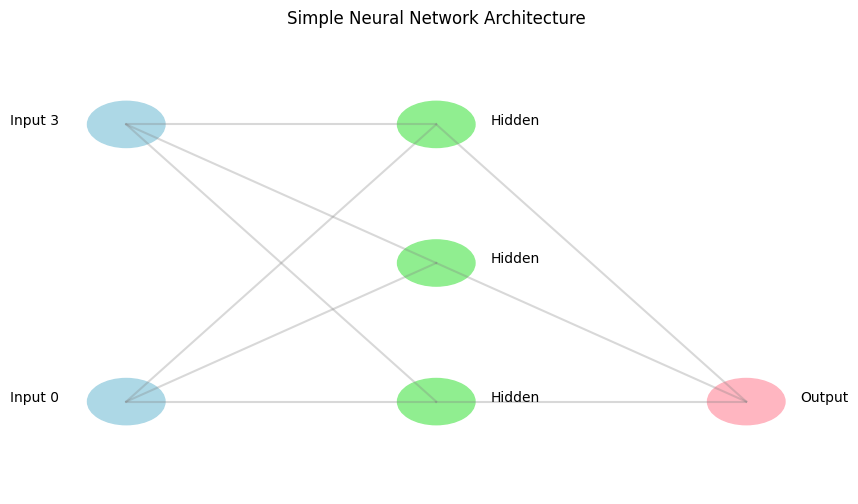

In [3]:
import matplotlib.patches as patches

def plot_neural_network():
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    
    # Coordinates for each layer
    layer_positions = [0.1, 0.5, 0.9]
    layer_neurons = [2, 3, 1]  # Number of neurons in each layer
    colors = ['lightblue', 'lightgreen', 'lightpink']
    
    # Plot neurons as circles
    for i, (pos, neurons, color) in enumerate(zip(layer_positions, layer_neurons, colors)):
        y_positions = np.linspace(0.2, 0.8, neurons)
        for y in y_positions:
            neuron = patches.Circle((pos, y), 0.05, color=color)
            ax.add_patch(neuron)
            
            # Add labels
            if i == 0:
                plt.text(pos-0.15, y, f'Input {int((y-0.2)*5)}')
            elif i == 1:
                plt.text(pos+0.07, y, f'Hidden')
            else:
                plt.text(pos+0.07, y, f'Output')
    
    # Draw connections between layers
    for i in range(len(layer_positions)-1):
        for y1 in np.linspace(0.2, 0.8, layer_neurons[i]):
            for y2 in np.linspace(0.2, 0.8, layer_neurons[i+1]):
                ax.plot([layer_positions[i], layer_positions[i+1]], 
                       [y1, y2], 'gray', alpha=0.3)
    
    # Set plot properties
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    plt.axis('off')
    plt.title('Simple Neural Network Architecture')
    plt.show()

# Plot the network
plot_neural_network()


## Understanding Backward Propagation (Backpropagation)

Backpropagation is how neural networks learn. It's like a teacher correcting mistakes:

1. First, we make a prediction (forward pass)
2. Then, we calculate how wrong we were (error)
3. Finally, we adjust our weights to do better next time (backward pass)

Let's understand this with a simple example:
- Imagine trying to predict a house price based on its size
- We'll use a tiny neural network with just one input and one output
- We'll see how the network learns to make better predictions

### The Learning Process:
1. **Forward Pass**: Make prediction
2. **Calculate Error**: Compare prediction with actual value
3. **Backward Pass**: 
   - Calculate how each weight contributed to the error
   - Update weights to reduce error
   
Let's implement this simple example:


Epoch 0, Error: 2.0102
Epoch 10, Error: 0.2592
Epoch 20, Error: 0.0334
Epoch 30, Error: 0.0043
Epoch 40, Error: 0.0006
Epoch 50, Error: 0.0001
Epoch 60, Error: 0.0000
Epoch 70, Error: 0.0000
Epoch 80, Error: 0.0000
Epoch 90, Error: 0.0000


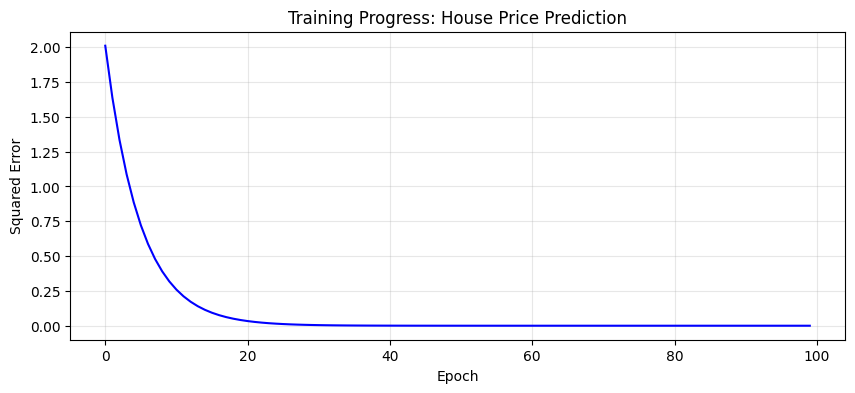

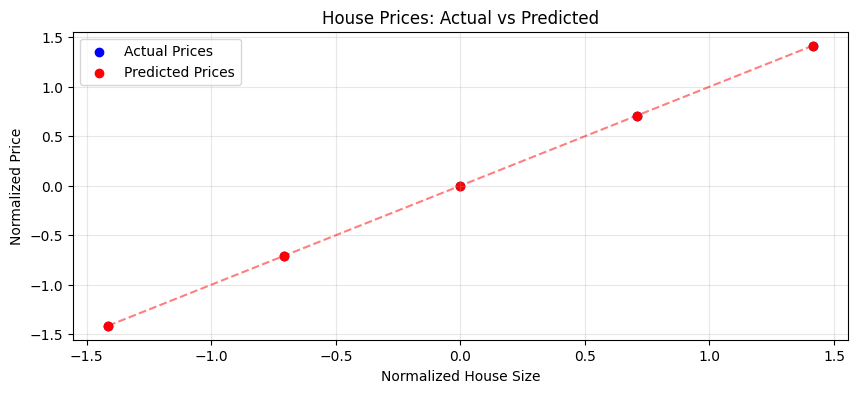

In [4]:
class SimpleHousePriceNetwork:
    def __init__(self):
        # Initialize with random weight and bias
        self.weight = np.random.randn()
        self.bias = np.random.randn()
        self.learning_rate = 0.01
        
    def forward(self, house_size):
        # Forward pass: predict house price
        self.input = house_size
        self.output = house_size * self.weight + self.bias
        return self.output
    
    def backward(self, house_size, true_price, predicted_price):
        # Calculate error
        error = true_price - predicted_price
        
        # Calculate gradients
        weight_gradient = -2 * house_size * error
        bias_gradient = -2 * error
        
        # Update weights and bias
        self.weight -= self.learning_rate * weight_gradient
        self.bias -= self.learning_rate * bias_gradient
        
        return error ** 2  # Return squared error for monitoring

# Create training data (house sizes in square feet and prices in thousands)
house_sizes = np.array([1000, 1500, 2000, 2500, 3000])
house_prices = np.array([200, 300, 400, 500, 600])

# Normalize the data (important for neural networks!)
house_sizes = (house_sizes - np.mean(house_sizes)) / np.std(house_sizes)
house_prices = (house_prices - np.mean(house_prices)) / np.std(house_prices)

# Create and train the network
house_network = SimpleHousePriceNetwork()

# Training loop
errors = []
epochs = 100

for epoch in range(epochs):
    epoch_error = 0
    for size, price in zip(house_sizes, house_prices):
        # Forward pass
        predicted_price = house_network.forward(size)
        
        # Backward pass
        error = house_network.backward(size, price, predicted_price)
        epoch_error += error
    
    errors.append(epoch_error)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Error: {epoch_error:.4f}")

# Plot training progress
plt.figure(figsize=(10, 4))
plt.plot(errors, 'b-')
plt.title('Training Progress: House Price Prediction')
plt.xlabel('Epoch')
plt.ylabel('Squared Error')
plt.grid(True, alpha=0.3)
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(10, 4))
predictions = [house_network.forward(size) for size in house_sizes]
plt.scatter(house_sizes, house_prices, c='b', label='Actual Prices')
plt.scatter(house_sizes, predictions, c='r', label='Predicted Prices')
plt.plot(house_sizes, predictions, 'r--', alpha=0.5)
plt.title('House Prices: Actual vs Predicted')
plt.xlabel('Normalized House Size')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Understanding the Backpropagation Example

Let's break down what happened in our house price prediction example:

1. **Network Structure**:
   - Input: House size (normalized)
   - Weight: Represents the relationship between size and price
   - Bias: Base price adjustment
   - Output: Predicted house price (normalized)

2. **Forward Pass** (`forward` method):
   ```python
   predicted_price = house_size * weight + bias
   ```
   - This is like saying: "bigger houses cost more"
   - The weight determines how much more
   - The bias adjusts the base price

3. **Error Calculation**:
   ```python
   error = true_price - predicted_price
   ```
   - Positive error: we predicted too low
   - Negative error: we predicted too high

4. **Backward Pass** (`backward` method):
   ```python
   weight_gradient = -2 * house_size * error
   bias_gradient = -2 * error
   ```
   - Calculates how to adjust weights and bias
   - The `-2` comes from the derivative of squared error
   - Larger errors cause larger adjustments

5. **Weight Update**:
   ```python
   weight -= learning_rate * weight_gradient
   bias -= learning_rate * bias_gradient
   ```
   - Small adjustments in the right direction
   - Learning rate controls adjustment size

The plots show:
1. **Training Progress**: Error decreasing over time
2. **Predictions vs Actual**: How well our model learned to predict prices

This simple example demonstrates the core principles of backpropagation:
- Calculate error
- Determine each parameter's contribution to the error
- Update parameters to reduce error
- Repeat until predictions improve


## Understanding Forward Propagation

Let's break down how forward propagation works in our neural network:

1. **Input Layer**: Takes in our input data (2 neurons)
2. **Hidden Layer**: 
   - Receives input through weighted connections
   - Applies activation function (sigmoid)
   - Has 3 neurons processing information
3. **Output Layer**:
   - Combines hidden layer outputs
   - Produces final prediction

The formula for each layer is:
```
Hidden Layer: h = sigmoid(X × W1 + b1)
Output Layer: y = sigmoid(h × W2 + b2)
```

Where:
- X: Input data
- W1, W2: Weight matrices
- b1, b2: Bias vectors
- sigmoid: Activation function

Let's visualize how the sigmoid activation function works:


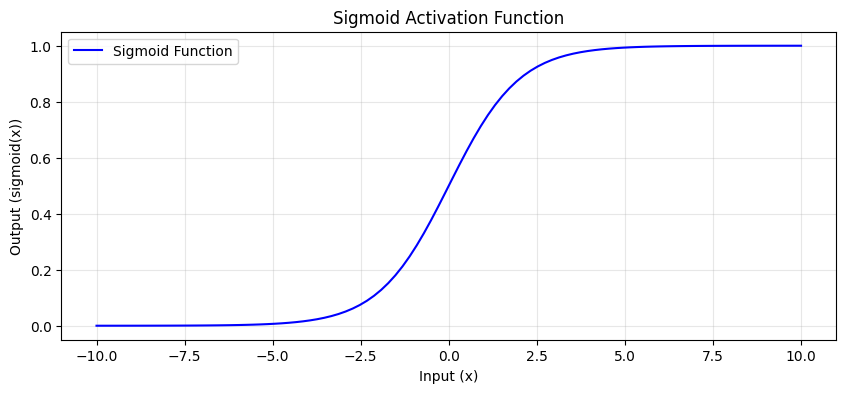

In [5]:
# Plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(10, 4))
plt.plot(x, y, 'b-', label='Sigmoid Function')
plt.grid(True, alpha=0.3)
plt.title('Sigmoid Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (sigmoid(x))')
plt.legend()
plt.show()


## Practical Example: XOR Problem

The XOR (exclusive OR) problem is a classic example used to demonstrate neural networks. It's a problem that can't be solved by a simple linear classifier, making it perfect for showing the power of neural networks.

XOR Truth Table:
```
Input A | Input B | Output
   0    |    0    |   0
   0    |    1    |   1
   1    |    0    |   1
   1    |    1    |   0
```

Let's train our neural network to learn this pattern:


Epoch 0, Error: 0.4989
Epoch 1000, Error: 0.4321
Epoch 2000, Error: 0.2279
Epoch 3000, Error: 0.1285
Epoch 4000, Error: 0.0924


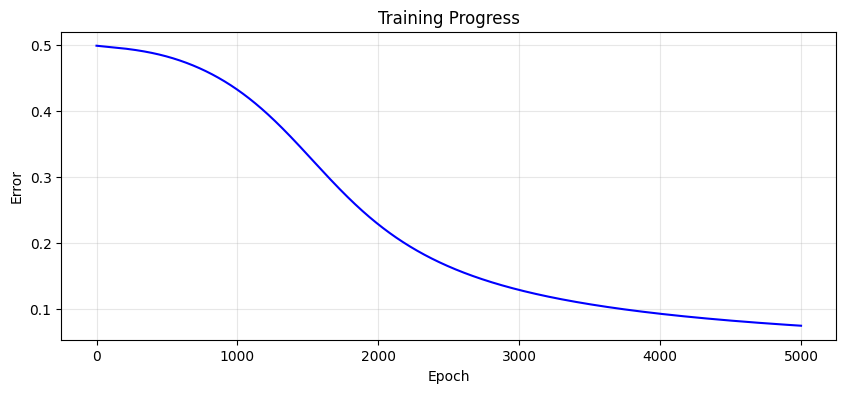


Testing the trained network:
Input: [0 0] -> Predicted Output: 0.0429 (Expected: 0)
Input: [0 1] -> Predicted Output: 0.9258 (Expected: 1)
Input: [1 0] -> Predicted Output: 0.9268 (Expected: 1)
Input: [1 1] -> Predicted Output: 0.1068 (Expected: 0)


In [6]:
class XORNeuralNetwork:
    def __init__(self):
        # Initialize weights and biases with random values
        self.weights1 = np.random.randn(2, 4)  # Input layer -> Hidden layer
        self.weights2 = np.random.randn(4, 1)  # Hidden layer -> Output layer
        self.bias1 = np.zeros((1, 4))
        self.bias2 = np.zeros((1, 1))
        self.learning_rate = 0.1
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        # Forward propagation
        self.hidden = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = self.sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output
    
    def backward(self, X, y, output):
        # Backward propagation
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        
        self.hidden_error = np.dot(self.output_delta, self.weights2.T)
        self.hidden_delta = self.hidden_error * self.sigmoid_derivative(self.hidden)
        
        # Update weights and biases
        self.weights2 += self.learning_rate * np.dot(self.hidden.T, self.output_delta)
        self.bias2 += self.learning_rate * np.sum(self.output_delta, axis=0, keepdims=True)
        self.weights1 += self.learning_rate * np.dot(X.T, self.hidden_delta)
        self.bias1 += self.learning_rate * np.sum(self.hidden_delta, axis=0, keepdims=True)
    
    def train(self, X, y, epochs):
        errors = []
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            error = np.mean(np.abs(y - output))
            errors.append(error)
            
            if epoch % 1000 == 0:
                print(f'Epoch {epoch}, Error: {error:.4f}')
        return errors

# Create training data for XOR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Create and train the network
xor_nn = XORNeuralNetwork()
errors = xor_nn.train(X, y, epochs=5000)

# Plot training progress
plt.figure(figsize=(10, 4))
plt.plot(errors, 'b-')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid(True, alpha=0.3)
plt.show()

# Test the network
print("\nTesting the trained network:")
predictions = xor_nn.forward(X)
for i in range(len(X)):
    print(f"Input: {X[i]} -> Predicted Output: {predictions[i][0]:.4f} (Expected: {y[i][0]})")


## Summary

In this tutorial, we've covered:

1. **Basic Neural Network Structure**
   - Input layer, hidden layer, and output layer
   - Weights and biases
   - Activation functions (sigmoid)

2. **Forward Propagation**
   - How data flows through the network
   - Matrix multiplication and bias addition
   - Activation function application

3. **Practical Implementation**
   - Built a neural network from scratch
   - Solved the XOR problem
   - Visualized the network architecture and training progress

This example demonstrates how neural networks can learn non-linear patterns that simple linear classifiers cannot handle. The XOR problem is a perfect example of this capability, as it requires the network to learn a non-linear decision boundary.

**Key Takeaways:**
- Neural networks consist of interconnected layers of neurons
- Each connection has a weight that is learned during training
- Non-linear activation functions (like sigmoid) enable complex pattern learning
- Training involves adjusting weights and biases to minimize error
